- `sns.load_dataset('penguins')`: Carga el dataset **Penguins**, que contiene información sobre tres especies de pingüinos en la Antártida. El dataset incluye varias características como el tamaño del pico, la masa corporal y la especie de pingüino.
  
- `df[['bill_length_mm', 'bill_depth_mm']]`: Selecciona dos características del dataset: la **longitud del pico** (`bill_length_mm`) y la **profundidad del pico** (`bill_depth_mm`).

- `dropna()`: Elimina las filas que contienen valores faltantes en las columnas seleccionadas.

- Esta línea añade una nueva columna al **DataFrame** `df_2d`, que contiene la información sobre la **especie del pingüino** (`species`). Esto es útil para poder distinguir las diferentes especies en la visualización.

   bill_length_mm  bill_depth_mm species
0            39.1           18.7  Adelie
1            39.5           17.4  Adelie
2            40.3           18.0  Adelie
4            36.7           19.3  Adelie
5            39.3           20.6  Adelie


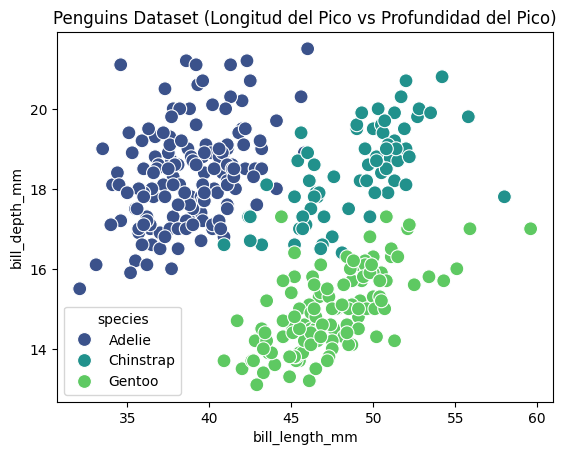

In [67]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset Penguins desde seaborn
df = sns.load_dataset('penguins')

# Seleccionar solo las dos características: bill_length_mm (longitud del pico) y bill_depth_mm (profundidad del pico)
df_2d = df[['bill_length_mm', 'bill_depth_mm']].dropna()

# Añadir la columna de especie para visualizar las etiquetas
df_2d['species'] = df['species']

# Mostrar las primeras filas
print(df_2d.head())

# Graficar los datos
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_2d, palette='viridis', s=100)
plt.title('Penguins Dataset (Longitud del Pico vs Profundidad del Pico)')
plt.show()


[[-0.88449874  0.78544923]
 [-0.81112573  0.1261879 ]
 [-0.66437972  0.43046236]
 [-1.32473679  1.08972369]
 [-0.84781224  1.74898502]]


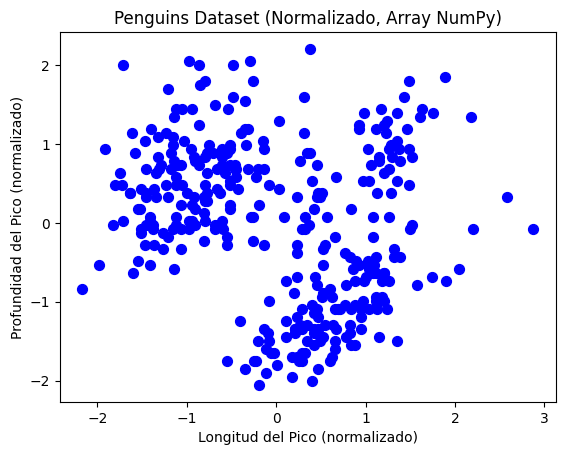

In [68]:
# Escalar los datos usando StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_2d[['bill_length_mm', 'bill_depth_mm']])

# Convertir a arrays NumPy
X_normalized_array = np.array(X_normalized)

# Mostrar los primeros cinco elementos del array NumPy
print(X_normalized_array[:5])

# Graficar los datos normalizados
plt.scatter(X_normalized_array[:, 0], X_normalized_array[:, 1], s=50, color='blue')
plt.title('Penguins Dataset (Normalizado, Array NumPy)')
plt.xlabel('Longitud del Pico (normalizado)')
plt.ylabel('Profundidad del Pico (normalizado)')
plt.show()

- **Importación del modelo Gaussian Mixture**: 
  - `GaussianMixture` es una clase de `sklearn` que permite ajustar un modelo de mezcla de gaussianas (GMM). GMM es un algoritmo de clustering no supervisado que modela los datos como una combinación de distribuciones gaussianas.

- **Inicialización del modelo**:
  - `GaussianMixture()`: Inicializa el modelo GMM.
  - `n_components=3`: Indica que queremos modelar los datos con **3 componentes gaussianas** o **clusters**. En este caso, parece estar basado en el conocimiento de que el dataset contiene tres especies de pingüinos.
  - `n_init=10`: El número de veces que el algoritmo de **EM** (Expectation-Maximization) se ejecutará con diferentes inicializaciones. El modelo selecciona la mejor solución de estas 10 inicializaciones. Esto es útil para evitar quedar atrapado en un óptimo local.
  - `random_state=42`: Fija la semilla aleatoria para asegurar que los resultados sean reproducibles. Si cambias este valor o lo omites, las inicializaciones serán diferentes cada vez que ejecutes el código.

- **Entrenamiento del modelo**:
  - `fit(X_normalized)`: Este comando ajusta el modelo GMM a los datos normalizados (`X_normalized`). El modelo intentará encontrar las mejores distribuciones gaussianas que se ajusten a los datos.
  - Durante el ajuste, el algoritmo de Expectation-Maximization (EM) estima los parámetros de las distribuciones gaussianas (media, covarianza y pesos) que mejor modelan los datos.
    - **Expectation (E)**: Calcula la probabilidad de que cada punto de datos pertenezca a cada una de las gaussianas.
    - **Maximization (M)**: Dado el valor calculado en la fase E, ajusta los parámetros de las gaussianas para maximizar la probabilidad total de los datos.


In [71]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_normalized)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [70]:
from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### ¿Qué hace este modelo?

- **Probabilidades**: En lugar de asignar rígidamente cada punto a un solo cluster, GMM asigna a cada punto una **probabilidad** de pertenecer a cada cluster. Esto es útil si los clusters se solapan.

- **Estimación de parámetros**: El modelo ajusta las **medias**, las **covarianzas** y los **pesos** de las tres distribuciones gaussianas para ajustarse a los datos.

### Descripción del Gráfico del Modelo de Mezcla de Gaussianas (GMM)

- **Componentes gaussianas**: Este gráfico muestra cómo el Gaussian Mixture Model (GMM) ha agrupado los datos en tres componentes gaussianas. Cada componente (gaussiana) está modelada por una **media** (centro de cada elipse) y una **covarianza** (forma y orientación de las elipses).

- **Visualización**: Las tres distribuciones gaussianas están visualizadas como elipses concéntricas de diferente tamaño. Las formas elípticas muestran que los clusters no son necesariamente esféricos (una ventaja sobre k-means).

- **Límites de decisión**: Las líneas discontinuas rojas representan los límites de decisión entre los clusters: en las regiones donde se cruzan, la pertenencia a un cluster es ambigua y tiene igual probabilidad de estar en dos clusters.

- **Clusters solapados**: El GMM permite que los clusters se solapen (como se puede ver en el gráfico), lo que significa que los puntos en ciertas áreas pueden pertenecer parcialmente a más de un cluster.


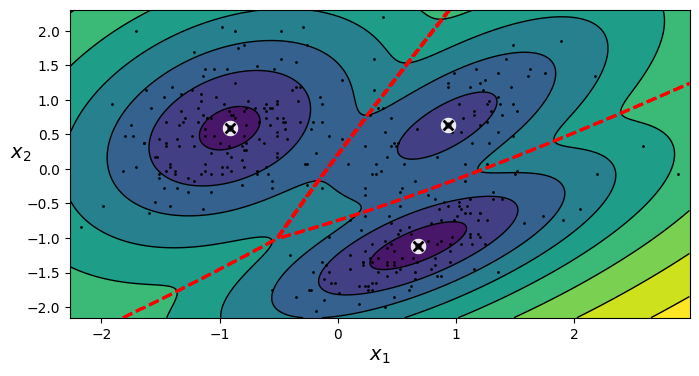

In [74]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_normalized)
plt.show()

### Pesos de los Componentes Gaussianos en GMM

- `gm.weights_` es un array de `n_components` valores, donde cada valor representa el **peso** o la **probabilidad** de que un punto de datos aleatorio pertenezca a uno de los componentes gaussianos.

In [75]:
gm.weights_

array([0.45719107, 0.35112661, 0.19168231])

### Medias de los Componentes en GMM

- El atributo `gm.means_` en un modelo Gaussian Mixture de sklearn contiene las **medias** de las distribuciones gaussianas que el modelo ha ajustado. 
- Estas medias representan el **centro** de cada uno de los componentes gaussianos o **clusters** del modelo.

In [76]:
gm.means_

array([[-0.91358279,  0.58998098],
       [ 0.68132085, -1.1117916 ],
       [ 0.93097799,  0.62940384]])

### Matrices de Covarianza en GMM

- Las **matrices de covarianza** definen la **forma** y la **orientación** de cada distribución gaussiana en el espacio de características.
- `gm.covariances_` te proporciona las **matrices de covarianza** de las gaussianas que ha ajustado el modelo GMM. 
- Estas matrices definen la **forma** y **orientación** de los clusters.

In [77]:
gm.covariances_

array([[[0.25347223, 0.10430701],
        [0.10430701, 0.37977218]],

       [[0.34388992, 0.21031481],
        [0.21031481, 0.24558186]],

       [[0.2746871 , 0.22689382],
        [0.22689382, 0.3706586 ]]])

### Predicción de Clusters en GMM

- `gm.predict(X_normalized)` asigna cada punto de datos al **cluster más probable** basado en las **distribuciones gaussianas** ajustadas por el modelo GMM.

In [78]:
gm.predict(X_normalized)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

### Probabilidades de Pertenencia en GMM

- `gm.predict_proba(X_normalized)` calcula la **probabilidad** de que cada punto de datos en `X_normalized` pertenezca a cada uno de los **clusters** del modelo GMM. 
- Devuelve una matriz donde cada fila corresponde a un punto de datos y cada columna representa la **probabilidad** de pertenencia a un cluster.

In [79]:
gm.predict_proba(X_normalized)

array([[9.99999195e-01, 2.46167857e-17, 8.04972820e-07],
       [9.99701988e-01, 1.69132684e-10, 2.98011715e-04],
       [9.99781635e-01, 4.13057357e-12, 2.18365366e-04],
       ...,
       [1.74695122e-07, 9.99282407e-01, 7.17418058e-04],
       [5.46897277e-05, 9.95405587e-01, 4.53972292e-03],
       [2.17908279e-06, 9.90730109e-01, 9.26771226e-03]])

### Generación de Nuevas Muestras en GMM

- `gm.sample(6)` genera **6 nuevas muestras** siguiendo las distribuciones gaussianas que el modelo ha ajustado. Estas nuevas muestras son similares a los datos originales en términos de su **distribución**.
- `X_new` contiene las **coordenadas** de las nuevas muestras, mientras que `y_new` indica de qué **componente gaussiano** proviene cada muestra.

In [80]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.11755204,  0.6337124 ],
       [-1.07971533,  0.50561344],
       [-0.33670194, -1.64442578],
       [ 1.02416441,  1.00392699],
       [ 1.25729384,  0.80913914],
       [ 1.26527334,  0.12645645]])

y_new contiene las etiquetas del componente (o cluster) de donde proviene cada punto de datos en X_new. Básicamente, te dice de qué gaussiana específica fue muestreado cada nuevo punto.

### Etiquetas de Nuevas Muestras en GMM

- `y_new` contiene las **etiquetas** del componente (o cluster) de donde proviene cada punto de datos en `X_new`. 
- Básicamente, te dice de qué **gaussiana específica** fue muestreado cada nuevo punto.

In [81]:
y_new

array([0, 0, 1, 2, 2, 2])

### Detección de Anomalías con GMM

1. **Calcular las densidades:**
   - `gm.score_samples(X_normalized)`: Este método calcula la densidad logarítmica (log-likelihood) de cada punto de datos en `X_normalized` bajo el modelo GMM ajustado.
   - Para cada punto, el GMM evalúa qué tan probable es que ese punto haya sido generado por las distribuciones gaussianas que ajustó. Es decir, devuelve un valor que indica qué tan "ajustado" está el punto a las gaussianas que forman el modelo.
   - `densities` es un array que contiene los valores de densidad logarítmica para cada punto en los datos. Los puntos con densidades más bajas son los que menos se ajustan al modelo y pueden considerarse **anomalías** o **outliers**.

2. **Definir el umbral de densidad para detectar anomalías:**
   - `np.percentile(densities, 4)`: Aquí estás calculando el percentil 4 de las densidades, lo que significa que tomas el valor de densidad por debajo del cual está el 4% de los puntos de datos.
   - Este valor de percentil 4 será el umbral que define las **anomalías**. Es decir, los puntos que tienen una densidad por debajo de este umbral se considerarán anomalías.
   - En este caso, `density_threshold` representa el valor de densidad que separa el 4% de los puntos más improbables (los posibles outliers) del 96% restante.

3. **Identificar las anomalías:**
   - `densities < density_threshold`: Esta condición genera un array booleano en el que cada punto es evaluado según si su densidad está por debajo del umbral del percentil 4. Si es `True`, el punto es considerado una anomalía.
   - `X_normalized[densities < density_threshold]`: Utilizando ese array booleano, seleccionas todos los puntos de `X_normalized` que cumplen con la condición de ser considerados anomalías (es decir, los puntos que tienen una densidad menor al umbral definido).


In [87]:
densities = gm.score_samples(X_normalized)
density_threshold = np.percentile(densities, 4)
anomalies = X_normalized[densities < density_threshold]

### Estrellas Rojas en el Gráfico

- **Estrellas rojas**: Estas estrellas indican las **anomalías** detectadas por el modelo.
- Las anomalías son puntos que están en áreas de **baja densidad de probabilidad**, lo que significa que tienen una baja probabilidad de pertenecer a cualquiera de los clusters ajustados por el GMM.
- En este caso, las anomalías están principalmente ubicadas en las **zonas externas**, lejos de los clusters principales, lo que tiene sentido porque estos puntos están en regiones donde la distribución gaussiana tiene poca influencia.

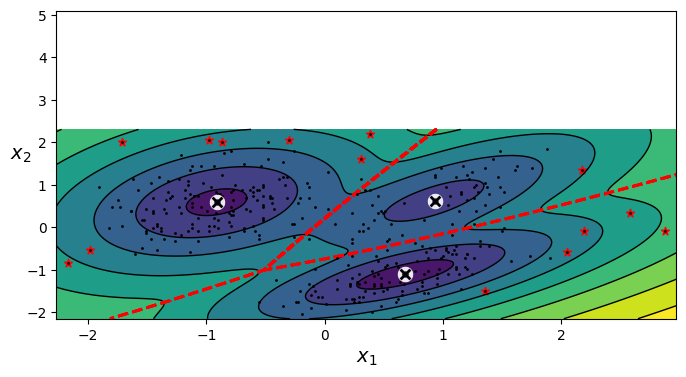

In [91]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_normalized)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

### BayesianGaussianMixture en sklearn

**BayesianGaussianMixture** es una clase de sklearn que implementa un modelo de mezcla de gaussianas con un enfoque bayesiano. En lugar de requerir un número fijo de componentes como el GMM estándar, este modelo ajusta el número de componentes automáticamente usando distribuciones a priori y métodos de inferencia bayesiana.

#### Inicializar el Modelo BGM

- **n_components=10**: Especifica el número máximo de componentes gaussianos (clusters) que el modelo debe considerar. A diferencia del GMM estándar, en BGM este número es un máximo, no un número fijo. El modelo puede decidir que algunos de esos componentes no son necesarios y asignarles un peso muy bajo, lo que efectivamente reduce el número de componentes relevantes.
- **n_init=10**: Este parámetro indica que el algoritmo se ejecutará 10 veces con diferentes inicializaciones, seleccionando la mejor solución. Esto es útil para evitar caer en óptimos locales.
- **random_state=42**: Fija la semilla aleatoria para hacer que los resultados sean reproducibles. Si no se especifica, el modelo puede producir resultados ligeramente diferentes en cada ejecución.

#### Entrenar el Modelo BGM

- **fit(X_normalized)**: Ajusta el modelo a los datos normalizados `X_normalized`. Durante el ajuste, el modelo estima las distribuciones gaussianas, así como el número de componentes más adecuado, utilizando un enfoque bayesiano.


### ¿Qué hace el BayesianGaussianMixture?

- **Determinación automática de componentes**: A diferencia del GMM estándar, donde especificas el número exacto de componentes, el BGM intenta encontrar el número adecuado de componentes mediante el uso de un enfoque bayesiano. Aunque `n_components=10` le da al modelo 10 componentes potenciales, este puede decidir que solo 3 o 4 son realmente necesarios y asignarles pesos significativos.

- **Pesos Dirichlet**: El modelo BGM utiliza una mezcla de distribuciones gaussianas con un proceso Dirichlet. Esto permite que el modelo determine cuántos componentes son realmente necesarios y ajuste los pesos de manera que algunos componentes tengan muy poco peso (efectivamente eliminándolos).

- **Regularización**: El enfoque bayesiano introduce una forma de regularización, lo que ayuda a evitar el sobreajuste y mejora la generalización del modelo.


In [84]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_normalized)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

### Explicación del atributo `bgm.weights_`

- **`bgm.weights_`**: Este atributo contiene los pesos asignados a cada uno de los componentes gaussianos (clusters) en el modelo ajustado.
  - Los pesos reflejan la proporción de datos que pertenece a cada componente gaussiano.
  - Un peso más alto significa que más puntos de datos están asociados con ese componente.

### Uso de los pesos en `bgm.weights_`

- **Interpretación de clusters**: Los pesos te ayudan a entender qué componentes (clusters) son más importantes o representan una mayor proporción de los datos.
- **Reducción del número de componentes**: Si algunos pesos son muy cercanos a 0, esto significa que esos componentes no son relevantes para el modelo y pueden ser ignorados.


In [89]:
np.round(bgm.weights_, 2)

array([0.37, 0.  , 0.18, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

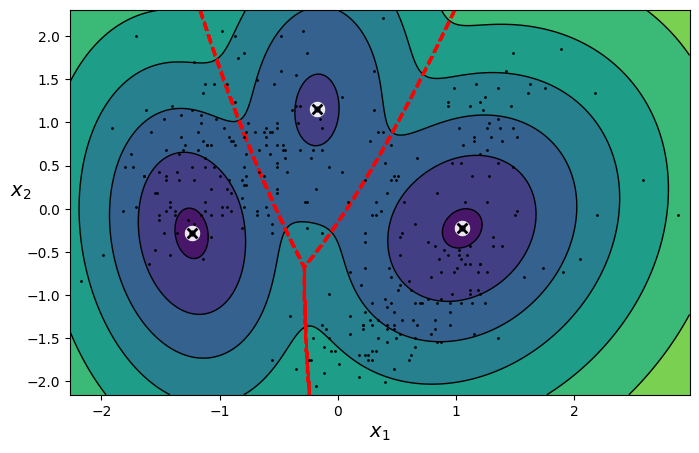

In [90]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_normalized)
plt.show()

### Comparación con el Gaussian Mixture Model (GMM)

- **Número de componentes**: El modelo Bayesian Gaussian Mixture ha reducido el número de componentes a tres, aunque se le permitió usar hasta 10. Esto demuestra la capacidad del modelo para ajustar el número de clusters de forma automática en función de los datos.
  
- **Flexibilidad**: A diferencia del GMM estándar, donde el número de componentes se fija desde el principio y no se ajusta automáticamente, el BGM puede determinar cuántos componentes son realmente necesarios, lo que lo hace más adaptable a la naturaleza de los datos.
